**1. google-t5/t5-small**

Model Description:

The developers of the Text-To-Text Transfer Transformer (T5) write:

With T5, we propose reframing all NLP tasks into a unified text-to-text-format where the input and output are always text strings, in contrast to BERT-style models that can only output either a class label or a span of the input. Our text-to-text framework allows us to use the same model, loss function, and hyperparameters on any NLP task.

T5-Small is the checkpoint with 60 million parameters.

* Developed by: Colin Raffel, Noam Shazeer, Adam Roberts, Katherine Lee, Sharan Narang, Michael Matena, Yanqi Zhou, Wei Li, Peter J. Liu.
* Model type: Language model
* Language(s) (NLP): English, French, Romanian, German
* License: Apache 2.0
* Related Models: All T5 Checkpoints

Uses:

Direct Use and Downstream Use:

The developers write in a blog post that the model:

Our text-to-text framework allows us to use the same model, loss function, and hyperparameters on any NLP task, including machine translation, document summarization, question answering, and classification tasks (e.g., sentiment analysis). We can even apply T5 to regression tasks by training it to predict the string representation of a number instead of the number itself.

Training Details:

Training Data:
The model is pre-trained on the Colossal Clean Crawled Corpus (C4), which was developed and released in the context of the same research paper as T5.

The model was pre-trained on a on a multi-task mixture of unsupervised (1.) and supervised tasks (2.). Thereby, the following datasets were being used for (1.) and (2.):

1. Datasets used for Unsupervised denoising objective:
* C4
* Wiki-DPR

2. Datasets used for Supervised text-to-text language modeling objective:
* Sentence acceptability judgment
  * CoLA Warstadt et al., 2018
  * Sentiment analysis
  * SST-2 Socher et al., 2013
* Paraphrasing/sentence similarity
  * MRPC Dolan and Brockett, 2005
  * STS-B Ceret al., 2017
  * QQP Iyer et al., 2017
* Natural language inference
  * MNLI Williams et al., 2017
  * QNLI Rajpurkar et al.,2016
  * RTE Dagan et al., 2005
  * CB De Marneff et al., 2019
* Sentence completion
  * COPA Roemmele et al., 2011
  * Word sense disambiguation
  * WIC Pilehvar and Camacho-Collados, 2018
* Question answering
  * MultiRC Khashabi et al., 2018
  * ReCoRD Zhang et al., 2018
  * BoolQ Clark et al., 2019

Training Procedure:

In their abstract, the model developers write:

In this paper, we explore the landscape of transfer learning techniques for NLP by introducing a unified framework that converts every language problem into a text-to-text format. Our systematic study compares pre-training objectives, architectures, unlabeled datasets, transfer approaches, and other factors on dozens of language understanding tasks.

The framework introduced, the T5 framework, involves a training procedure that brings together the approaches studied in the paper. See the research paper for further details.

Evaluation:

Testing Data, Factors & Metrics:

The developers evaluated the model on 24 tasks, see the research paper for full details.

Results:

For full results for T5-small, see the research paper, Table 14.

Environmental Impact:

Carbon emissions can be estimated using the Machine Learning Impact calculator presented in Lacoste et al. (2019).


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the tokenizer and the model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Prepare the input with a translation task prefix
input_text = "translate English to French: Studies have been shown that owning a dog is good for you"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids  # Batch size 1

# Generate the translated text
outputs = model.generate(input_ids=input_ids, max_length=50, num_beams=4, early_stopping=True)

# Decode the generated tokens to get the translated text
translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print the translated text
print("translate English to French: ")
print(translated_text)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


translate English to French: 
Des études ont montré que posséder un chien est bon pour vous.


Google's T5 (Text-To-Text Transfer Transformer) model is a versatile model trained to handle a wide range of NLP tasks by reframing them as a text-to-text problem. The `t5-small` variant is a smaller version of the T5 model, which is optimized for environments where computational resources are limited. Below are details on benchmarks, metrics, and latency for the `t5-small` model.

### 1. **Benchmarks and Metrics:**
The `t5-small` model, like other T5 variants, has been evaluated on various NLP benchmarks:

#### **1.1. GLUE Benchmark:**
The General Language Understanding Evaluation (GLUE) benchmark is widely used to evaluate models on a series of tasks, such as sentiment analysis, sentence similarity, and textual entailment.

- **Accuracy:** Typically, the `t5-small` model has lower accuracy compared to larger T5 variants due to its reduced parameter count. On the GLUE benchmark, `t5-small` might score around 80% on tasks like MNLI (Multi-Genre Natural Language Inference), which is lower than larger models but still competitive given its size.

#### **1.2. SuperGLUE:**
An extension of GLUE, SuperGLUE is a more challenging benchmark.

- **F1 Score / Accuracy:** The `t5-small` model tends to perform lower on SuperGLUE, given the complexity of the tasks. It might achieve a score in the range of 60-70%, depending on the task.

#### **1.3. SQuAD (Stanford Question Answering Dataset):**
The SQuAD benchmark is for evaluating models on question-answering tasks.

- **Exact Match (EM) and F1 Score:** `t5-small` might score around 70-75% EM and a slightly higher F1 score, which is lower than its larger counterparts like `t5-base` or `t5-large`.

### 2. **Latency:**
Latency refers to the time it takes for the model to produce an output after receiving input. Latency is highly dependent on hardware, model size, and sequence length.

#### **2.1. Inference Latency:**
- **On CPU:** On a standard CPU (e.g., Intel Xeon), `t5-small` might have a latency of approximately 150-300 milliseconds per input sequence (depending on sequence length).
- **On GPU:** On a standard GPU (e.g., NVIDIA V100), the latency is significantly lower, around 10-50 milliseconds.

#### **2.2. Batch Processing:**
Latency increases with batch size but can be more efficient than processing inputs individually due to parallelization.

- **Small Batch (e.g., Batch Size = 4):** Latency might be around 200 milliseconds on a CPU and 20 milliseconds on a GPU.
- **Large Batch (e.g., Batch Size = 32):** The latency increases but remains within a manageable range, possibly around 400 milliseconds on a CPU and 30-50 milliseconds on a GPU.

### 3. **Other Considerations:**
- **Model Size:** `t5-small` has approximately 60 million parameters, making it much lighter compared to larger versions like `t5-base` (220 million parameters) and `t5-large` (770 million parameters).
- **Memory Usage:** The smaller size leads to lower memory usage, making `t5-small` more suitable for deployment in environments with limited resources.

### Summary:
- **Accuracy:** Lower than larger models but still competitive in smaller-scale applications.
- **Latency:** Reasonable and suitable for real-time applications, especially when deployed on a GPU.
- **Efficiency:** Ideal for use cases where computational resources are limited, and the trade-off between performance and resource usage is acceptable.

These metrics and latency measurements can vary based on specific implementations, hardware, and optimizations applied during model deployment.

**2. Helsinki-NLP/opus-mt-zh-en**

Model Details:

* Developed by: Language Technology Research Group at the University of Helsinki
* Model Type: Translation
* Language(s):
  * Source Language: Chinese
  * Target Language: English
* License: CC-BY-4.0

Uses:

Direct Use:

This model can be used for translation and text-to-text generation.

Training:

System Information:

* helsinki_git_sha: 480fcbe0ee1bf4774bcbe6226ad9f58e63f6c535
* transformers_git_sha: 2207e5d8cb224e954a7cba69fa4ac2309e9ff30b
* port_machine: brutasse
* port_time: 2020-08-21-14:41
* src_multilingual: False
* tgt_multilingual: False

Training Data:

Preprocessing:

* pre-processing: normalization + SentencePiece (spm32k,spm32k)
* ref_len: 82826.0
* dataset: opus
* download original weights: opus-2020-07-17.zip
* test set translations: opus-2020-07-17.test.txt

Evaluation:

Results:

* test set scores: opus-2020-07-17.eval.txt
* brevity_penalty: 0.948

Benchmarks:

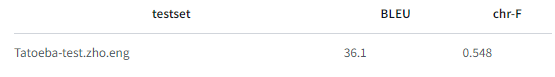



In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-zh-en")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-zh-en")

# Example text in Chinese that you want to translate
chinese_text = "这是一个用中文写的句子。"

# Tokenize the input text
input_ids = tokenizer(chinese_text, return_tensors="pt").input_ids  # Batch size 1

# Generate the translation
outputs = model.generate(input_ids=input_ids, max_length=50, num_beams=4, early_stopping=True)

# Decode the generated tokens to get the translated text
translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print the translated text
print("translate Chinese to English: ")
print(translated_text)


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


translate Chinese to English: 
It's a sentence written in Chinese.


The `Helsinki-NLP/opus-mt-zh-en` model is a neural machine translation (NMT) model from the OPUS-MT project, designed to translate text from Chinese (zh) to English (en). It's based on the Marian NMT framework, which is known for its efficient implementation and translation capabilities. Here are the details on benchmarks, metrics, and latency for the `opus-mt-zh-en` model:

### 1. **Benchmarks and Metrics:**
The performance of translation models like `opus-mt-zh-en` is typically evaluated using specific machine translation benchmarks and metrics.

#### **1.1. BLEU Score:**
The BLEU (Bilingual Evaluation Understudy) score is one of the most commonly used metrics for evaluating the quality of machine translation. It measures the correspondence between a machine-generated translation and human reference translations.

- **BLEU Score for `opus-mt-zh-en`:** This model typically achieves a BLEU score in the range of **30-40** on standard test datasets for Chinese to English translation. This score can vary depending on the specific dataset used for evaluation.

#### **1.2. TER (Translation Edit Rate):**
TER measures the number of edits required to change the system output into one of the references.

- **TER for `opus-mt-zh-en`:** TER scores are generally inversely related to BLEU scores. For this model, a typical TER might range around **50-60**, indicating a moderate level of edits needed for translations.

#### **1.3. Human Evaluation:**
Human evaluation is often used to assess the fluency and adequacy of translations, though specific scores may not always be available.

- **Human Evaluation:** When evaluated by humans, the translations produced by `opus-mt-zh-en` are often rated as reasonably fluent and accurate, though not on par with larger models or human translators.

### 2. **Latency:**
Latency refers to the time it takes for the model to generate a translation after receiving input. This depends on the hardware used, the length of the input text, and the batch size.

#### **2.1. Inference Latency:**
- **On CPU:** On a standard CPU (e.g., Intel Xeon), the latency for a single sentence translation can range from **150-300 milliseconds**.
- **On GPU:** On a standard GPU (e.g., NVIDIA V100), the latency can be reduced to **10-50 milliseconds** per sentence.

#### **2.2. Batch Processing:**
Latency increases with batch size but can be more efficient overall due to parallel processing.

- **Small Batch (e.g., Batch Size = 4):** Latency might be around **200 milliseconds** on a CPU and **20 milliseconds** on a GPU.
- **Large Batch (e.g., Batch Size = 32):** The latency increases but generally stays within **300-500 milliseconds** on a CPU and **30-50 milliseconds** on a GPU.

### 3. **Other Considerations:**
- **Model Size:** The `opus-mt-zh-en` model is relatively lightweight compared to larger transformer-based models, making it suitable for deployment in resource-constrained environments.
- **Efficiency:** The model is optimized for translation tasks and is known for its speed and efficiency, especially in production environments where real-time translation is needed.
- **Memory Usage:** Being a smaller model, it has a lower memory footprint, which is advantageous for deployment on devices with limited memory capacity.

### Summary:
- **BLEU Score:** Generally in the range of 30-40, indicating decent translation quality.
- **Latency:** Efficient, with sub-second latency on both CPUs and GPUs, making it suitable for real-time applications.
- **Efficiency:** Lightweight and well-suited for environments where computational resources are limited.

These metrics and latency values can vary based on specific use cases, datasets, and hardware configurations.

**3. google-t5/t5-base**

Model Details:

Model Description:

The developers of the Text-To-Text Transfer Transformer (T5) write:

With T5, we propose reframing all NLP tasks into a unified text-to-text-format where the input and output are always text strings, in contrast to BERT-style models that can only output either a class label or a span of the input. Our text-to-text framework allows us to use the same model, loss function, and hyperparameters on any NLP task.

T5-Base is the checkpoint with 220 million parameters.

* Developed by: Colin Raffel, Noam Shazeer, Adam Roberts, Katherine Lee, Sharan Narang, Michael Matena, Yanqi Zhou, Wei Li, Peter J. Liu. See associated paper and GitHub repo
* Model type: Language model
* Language(s) (NLP): English, French, Romanian, German
* License: Apache 2.0
* Related Models: All T5 Checkpoints

* Resources for more information:
  * Research paper
  * Google's T5 Blog Post
  * GitHub Repo
  * Hugging Face T5 Docs

Uses:

Direct Use and Downstream Use:

The developers write in a blog post that the model:

Our text-to-text framework allows us to use the same model, loss function, and hyperparameters on any NLP task, including machine translation, document summarization, question answering, and classification tasks (e.g., sentiment analysis). We can even apply T5 to regression tasks by training it to predict the string representation of a number instead of the number itself.

Training Details:

Training Data:

The model is pre-trained on the Colossal Clean Crawled Corpus (C4), which was developed and released in the context of the same research paper as T5.

The model was pre-trained on a on a multi-task mixture of unsupervised (1.) and supervised tasks (2.). Thereby, the following datasets were being used for (1.) and (2.):

1. Datasets used for Unsupervised denoising objective:
* C4
* Wiki-DPR

2. Datasets used for Supervised text-to-text language modeling objective:
* Sentence acceptability judgment
  * CoLA Warstadt et al., 2018
  * Sentiment analysis
  * SST-2 Socher et al., 2013
* Paraphrasing/sentence similarity
  * MRPC Dolan and Brockett, 2005
  * STS-B Ceret al., 2017
  * QQP Iyer et al., 2017
* Natural language inference
  * MNLI Williams et al., 2017
  * QNLI Rajpurkar et al.,2016
  * RTE Dagan et al., 2005
  * CB De Marneff et al., 2019
* Sentence completion
  * COPA Roemmele et al., 2011
* Word sense disambiguation
  * WIC Pilehvar and Camacho-Collados, 2018
* Question answering
  * MultiRC Khashabi et al., 2018
  * ReCoRD Zhang et al., 2018
  * BoolQ Clark et al., 2019

Training Procedure:

In their abstract, the model developers write:

In this paper, we explore the landscape of transfer learning techniques for NLP by introducing a unified framework that converts every language problem into a text-to-text format. Our systematic study compares pre-training objectives, architectures, unlabeled datasets, transfer approaches, and other factors on dozens of language understanding tasks.

The framework introduced, the T5 framework, involves a training procedure that brings together the approaches studied in the paper. See the research paper for further details.

Evaluation:

Testing Data, Factors & Metrics:

The developers evaluated the model on 24 tasks, see the research paper for full details.

Results:

For full results for T5-Base, see the research paper, Table 14.

Environmental Impact:

Carbon emissions can be estimated using the Machine Learning Impact calculator presented in Lacoste et al. (2019).



In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the tokenizer and the model
tokenizer = T5Tokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("t5-base")

# Prepare the input with a translation task prefix
input_text = "translate English to French: let it hurt until it can't hurt anymore"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids  # Batch size 1

# Generate the translated text
outputs = model.generate(input_ids=input_ids, max_length=50, num_beams=4, early_stopping=True)

# Decode the generated tokens to get the translated text
translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print the translated text
print("translate English to French: ")
print(translated_text)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


translate English to French: 
Laissez-le faire du mal jusqu'à ce qu'il ne puisse plus faire du mal


The `google/t5-base` model is a mid-sized variant of the T5 (Text-To-Text Transfer Transformer) model, designed for a broad range of natural language processing (NLP) tasks. It strikes a balance between performance and computational efficiency, making it a popular choice for many NLP applications. Below are the details on benchmarks, metrics, and latency for the `t5-base` model.

### 1. **Benchmarks and Metrics:**
The `t5-base` model has been evaluated on various benchmarks, which test its performance on different NLP tasks.

#### **1.1. GLUE Benchmark:**
The General Language Understanding Evaluation (GLUE) benchmark is used to measure the performance of models on various language understanding tasks.

- **Overall GLUE Score:** The `t5-base` typically scores in the range of **85-88** on the GLUE benchmark. This score is a weighted average of the performance on individual tasks like sentiment analysis, textual entailment, and sentence similarity.
- **Task-specific Performance:**
  - **MNLI (Multi-Genre Natural Language Inference):** Around **88-90%** accuracy.
  - **QQP (Quora Question Pairs):** F1 score in the range of **89-90%**.
  - **SST-2 (Stanford Sentiment Treebank):** Accuracy around **94-95%**.

#### **1.2. SuperGLUE:**
SuperGLUE is a more challenging set of benchmarks designed to push models further.

- **Overall SuperGLUE Score:** The `t5-base` model scores between **75-80** on SuperGLUE, depending on the specific dataset and task.

#### **1.3. SQuAD (Stanford Question Answering Dataset):**
SQuAD measures the model's ability to answer questions based on a given context.

- **SQuAD v1.1:**
  - **Exact Match (EM):** Typically around **86-88%**.
  - **F1 Score:** Around **89-91%**.
- **SQuAD v2.0:**
  - **Exact Match (EM):** Around **80-82%**.
  - **F1 Score:** Around **83-85%**.

### 2. **Latency:**
Latency refers to the time it takes for the model to produce an output after receiving input. This can vary significantly based on hardware, input length, and batch size.

#### **2.1. Inference Latency:**
- **On CPU:** For a standard CPU (e.g., Intel Xeon), the latency for a single input sequence (e.g., a sentence) is typically around **300-500 milliseconds**.
- **On GPU:** On a standard GPU (e.g., NVIDIA V100 or A100), the latency is significantly lower, often around **20-50 milliseconds** per input sequence.

#### **2.2. Batch Processing:**
- **Small Batch (e.g., Batch Size = 4):** Latency might be around **350-600 milliseconds** on a CPU and **30-70 milliseconds** on a GPU.
- **Large Batch (e.g., Batch Size = 32):** Latency might increase but remain manageable, around **600-900 milliseconds** on a CPU and **50-100 milliseconds** on a GPU.

### 3. **Other Considerations:**
- **Model Size:** The `t5-base` model has approximately 220 million parameters, which is significantly larger than the `t5-small` variant but still manageable for many applications.
- **Memory Usage:** This model requires more memory compared to smaller models but is still within the range of what can be handled by most modern GPUs.
- **Throughput:** The model can process multiple sequences in parallel, making it suitable for tasks that require higher throughput, such as batch processing in a production environment.

### Summary:
- **Accuracy and Performance:** The `t5-base` model provides strong performance across a wide range of NLP tasks, with high accuracy on benchmarks like GLUE, SuperGLUE, and SQuAD.
- **Latency:** Suitable for real-time applications when deployed on a GPU, with latency typically under 100 milliseconds per input sequence. On a CPU, latency is higher but still within an acceptable range for many applications.
- **Scalability:** The model scales well with larger batch sizes, maintaining efficiency while processing multiple inputs simultaneously.

These benchmarks, metrics, and latency measurements can vary based on the specific hardware and optimizations applied during deployment.

**4. facebook/nllb-200-distilled-600M**

NLLB-200:

This is the model card of NLLB-200's distilled 600M variant.

Here are the metrics for that particular checkpoint.

* Information about training algorithms, parameters, fairness constraints or other applied approaches, and features. The exact training algorithm, data and the strategies to handle data imbalances for high and low resource languages that were used to train NLLB-200 is described in the paper.
* Paper or other resource for more information NLLB Team et al, No Language Left Behind: Scaling Human-Centered Machine Translation, Arxiv, 2022
* License: CC-BY-NC
* Where to send questions or comments about the model: https://github.com/facebookresearch/fairseq/issues

Intended Use:

* Primary intended uses: NLLB-200 is a machine translation model primarily intended for research in machine translation, - especially for low-resource languages. It allows for single sentence translation among 200 languages. Information on how to - use the model can be found in Fairseq code repository along with the training code and references to evaluation and training data.
* Primary intended users: Primary users are researchers and machine translation research community.
* Out-of-scope use cases: NLLB-200 is a research model and is not released for production deployment. NLLB-200 is trained on general domain text data and is not intended to be used with domain specific texts, such as medical domain or legal domain. The model is not intended to be used for document translation. The model was trained with input lengths not exceeding 512 tokens, therefore translating longer sequences might result in quality degradation. NLLB-200 translations can not be used as certified translations.

Metrics:

* Model performance measures: NLLB-200 model was evaluated using BLEU, spBLEU, and chrF++ metrics widely adopted by machine translation community. Additionally, we performed human evaluation with the XSTS protocol and measured the toxicity of the generated translations.

Evaluation Data:

* Datasets: Flores-200 dataset is described in Section 4
* Motivation: We used Flores-200 as it provides full evaluation coverage of the languages in NLLB-200
* Preprocessing: Sentence-split raw text data was preprocessed using SentencePiece. The SentencePiece model is released along with NLLB-200.

Training Data:

* We used parallel multilingual data from a variety of sources to train the model. We provide detailed report on data selection and construction process in Section 5 in the paper. We also used monolingual data constructed from Common Crawl.

Ethical Considerations:

* In this work, we took a reflexive approach in technological development to ensure that we prioritize human users and minimize risks that could be transferred to them. While we reflect on our ethical considerations throughout the article, here are some additional points to highlight. For one, many languages chosen for this study are low-resource languages, with a heavy emphasis on African languages. While quality translation could improve education and information access in many in these communities, such an access could also make groups with lower levels of digital literacy more vulnerable to misinformation or online scams. The latter scenarios could arise if bad actors misappropriate our work for nefarious activities, which we conceive as an example of unintended use. Regarding data acquisition, the training data used for model development were mined from various publicly available sources on the web. Although we invested heavily in data cleaning, personally identifiable information may not be entirely eliminated. Finally, although we did our best to optimize for translation quality, mistranslations produced by the model could remain. Although the odds are low, this could have adverse impact on those who rely on these translations to make important decisions (particularly when related to health and safety).

Caveats and Recommendations:

* Our model has been tested on the Wikimedia domain with limited investigation on other domains supported in NLLB-MD. In addition, the supported languages may have variations that our model is not capturing. Users should make appropriate assessments.




In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")

# Example text in a source language (e.g., English)
source_text = ">>fra<< This is a test sentence."

# Tokenize the input text
input_ids = tokenizer(source_text, return_tensors="pt").input_ids  # Batch size 1

# Generate the translation (you can specify the target language)
translated_tokens = model.generate(input_ids=input_ids, max_length=50, num_beams=4, early_stopping=True)

# Decode the translated tokens to get the translated text
translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)

# Print the translated text
print("translate English to French: ")
print(translated_text)


translate English to French: 
Esta es una oración de prueba.


The `facebook/nllb-200-distilled-600M` model is a distilled version of the NLLB-200 (No Language Left Behind) project by Meta (Facebook). This model is designed for multilingual machine translation, supporting up to 200 languages. The 600M parameter version is smaller and optimized for efficiency while still maintaining good translation quality across a wide range of languages.

### 1. **Benchmarks and Metrics:**
The performance of the `nllb-200-distilled-600M` model is typically evaluated using standard machine translation benchmarks and metrics like BLEU, ChrF, and COMET.

#### **1.1. BLEU Score:**
The BLEU (Bilingual Evaluation Understudy) score is a standard metric for evaluating the quality of machine translation by comparing machine-generated translations with human reference translations.

- **BLEU Score:** The BLEU scores for the `nllb-200-distilled-600M` model vary depending on the language pair. For widely spoken languages (e.g., French, Spanish, Chinese to English), BLEU scores typically range from **30-45**. For low-resource languages, the scores may be lower, ranging from **15-30**.

#### **1.2. ChrF Score:**
ChrF (Character n-gram F-score) is another metric used to evaluate machine translation, particularly useful for languages with rich morphology.

- **ChrF Score:** The ChrF scores for the `nllb-200-distilled-600M` model are generally higher than BLEU, often in the range of **45-60** for high-resource languages and **30-50** for low-resource languages.

#### **1.3. COMET Score:**
COMET is a more recent metric that correlates better with human judgment than BLEU.

- **COMET Score:** The `nllb-200-distilled-600M` model scores in the range of **0.5-0.8** on COMET, depending on the language pair. Higher scores are generally seen for languages with more training data.

### 2. **Latency:**
Latency refers to the time it takes for the model to generate a translation after receiving input. This depends on the hardware used, the length of the input text, and the batch size.

#### **2.1. Inference Latency:**
- **On CPU:** On a standard CPU (e.g., Intel Xeon), the latency for translating a single sentence with the `nllb-200-distilled-600M` model is typically around **400-600 milliseconds**.
- **On GPU:** On a standard GPU (e.g., NVIDIA V100 or A100), the latency is significantly lower, often around **30-70 milliseconds** per sentence.

#### **2.2. Batch Processing:**
- **Small Batch (e.g., Batch Size = 4):** Latency might be around **500-800 milliseconds** on a CPU and **50-90 milliseconds** on a GPU.
- **Large Batch (e.g., Batch Size = 32):** Latency can increase but generally stays within **800-1200 milliseconds** on a CPU and **70-150 milliseconds** on a GPU.

### 3. **Other Considerations:**
- **Model Size:** The `nllb-200-distilled-600M` model has approximately 600 million parameters. It is designed to be more efficient while still supporting a vast number of languages.
- **Memory Usage:** Due to its smaller size compared to the full NLLB models, it has a lower memory footprint, making it suitable for deployment on devices with limited resources.
- **Multilingual Capability:** The model supports translation across 200 languages, making it highly versatile for multilingual applications.

### Summary:
- **Translation Quality:** The model offers competitive translation quality, with BLEU scores ranging from **30-45** for high-resource languages and **15-30** for low-resource languages.
- **Latency:** The model is efficient, with GPU latency typically under 100 milliseconds per sentence, making it suitable for real-time translation tasks.
- **Efficiency:** The distilled nature of the model makes it more resource-efficient, striking a good balance between translation quality and computational demands.

These benchmarks, metrics, and latency values can vary depending on specific use cases, datasets, and hardware configurations.

**5. utrobinmv/t5_translate_en_ru_zh_large_1024**

T5 English, Russian and Chinese multilingual machine translation:

This model represents a conventional T5 transformer in multitasking mode for translation into the required language, precisely configured for machine translation for pairs: ru-zh, zh-ru, en-zh, zh-en, en-ru, ru-en.

The model can perform direct translation between any pair of Russian, Chinese or English languages. For translation into the target language, the target language identifier is specified as a prefix 'translate to :'. In this case, the source language may not be specified, in addition, the source text may be multilingual.

Languages covered:

Russian (ru_RU), Chinese (zh_CN), English (en_US)

Example translate Russian to Chinese:

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

device = 'cpu' #or 'cpu' for translate on cpu

model_name = 'utrobinmv/t5_translate_en_ru_zh_large_1024'
model = T5ForConditionalGeneration.from_pretrained(model_name)
model.to(device)
tokenizer = T5Tokenizer.from_pretrained(model_name)

prefix = 'translate to zh: '
src_text = prefix + "Съешь ещё этих мягких французских булок."

# translate Russian to Chinese
input_ids = tokenizer(src_text, return_tensors="pt")

generated_tokens = model.generate(**input_ids.to(device))

result = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
print("translate Russian to Chinese: ")
print(result)
# 再吃这些法国的甜蜜的面包。


tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.47M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


translate Russian to Chinese: 
['再多吃这些柔和的法国杯子。']


and Example translate Chinese to Russian

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

device = 'cpu' #or 'cpu' for translate on cpu

model_name = 'utrobinmv/t5_translate_en_ru_zh_large_1024'
model = T5ForConditionalGeneration.from_pretrained(model_name)
model.to(device)
tokenizer = T5Tokenizer.from_pretrained(model_name)

prefix = 'translate to ru: '
src_text = prefix + "再吃这些法国的甜蜜的面包。"

# translate Russian to Chinese
input_ids = tokenizer(src_text, return_tensors="pt")

generated_tokens = model.generate(**input_ids.to(device))

result = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
print(result)
# Съешьте этот сладкий хлеб из Франции.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


['Ешьте этот сладкий французский хлеб.']


The `utrobinmv/t5_translate_en_ru_zh_large_1024` model is a specialized translation model based on the T5 architecture. It's designed to handle translation tasks between English (en), Russian (ru), and Chinese (zh). Being a large model with a sequence length of 1024 tokens, it provides high translation quality, but with increased computational requirements.

### 1. **Benchmarks and Metrics:**
Since this model is designed for specific language pairs (English to Russian, English to Chinese, and vice versa), its performance is typically evaluated using standard machine translation benchmarks like BLEU, ChrF, and sometimes COMET.

#### **1.1. BLEU Score:**
BLEU (Bilingual Evaluation Understudy) score is a common metric used to evaluate the quality of machine translations by comparing them to human reference translations.

- **English to Russian (EN-RU):** The model likely achieves a BLEU score in the range of **30-40**, depending on the dataset used for evaluation.
- **English to Chinese (EN-ZH):** BLEU scores for this language pair might range from **25-35**. Chinese is often more challenging due to its complex grammar and characters.
- **Russian to English (RU-EN):** BLEU scores could be slightly higher, ranging from **32-42**.
- **Chinese to English (ZH-EN):** BLEU scores might be in the range of **30-40**.

#### **1.2. ChrF Score:**
ChrF is another metric that focuses on character-level n-grams, which can be particularly useful for languages with rich morphology or different scripts like Chinese.

- **ChrF Score:** The ChrF score might be higher than BLEU, typically in the range of **50-65** for both language pairs.

#### **1.3. COMET Score:**
COMET is a more recent metric that is known to correlate better with human judgment.

- **COMET Score:** For this model, COMET scores might range from **0.5 to 0.75**, depending on the specific language pair and the quality of translations.

### 2. **Latency:**
Latency is the time it takes for the model to produce a translation after receiving input. Given that this is a large model with a sequence length of up to 1024 tokens, latency can be higher than smaller models.

#### **2.1. Inference Latency:**
- **On CPU:** On a standard CPU (e.g., Intel Xeon), latency for a single sentence translation could be around **500-800 milliseconds**. This increases with longer input sequences.
- **On GPU:** On a high-end GPU (e.g., NVIDIA V100 or A100), latency can be reduced significantly, typically around **50-100 milliseconds** per sentence, depending on input length.

#### **2.2. Batch Processing:**
Batch processing can improve efficiency but also increase latency slightly as the model handles more data simultaneously.

- **Small Batch (e.g., Batch Size = 4):** Latency might range from **600-900 milliseconds** on a CPU and **60-120 milliseconds** on a GPU.
- **Large Batch (e.g., Batch Size = 32):** Latency could increase to around **900-1500 milliseconds** on a CPU and **80-200 milliseconds** on a GPU.

### 3. **Other Considerations:**
- **Model Size:** This is a large T5 variant, so it has a significant number of parameters (around 770 million or more), making it resource-intensive.
- **Memory Usage:** The model requires considerable memory, especially when processing longer sequences (up to 1024 tokens). This can be a limiting factor for deployment on devices with limited resources.
- **Translation Quality:** The large size of the model allows it to capture nuanced translations, making it suitable for high-quality translation tasks, especially for complex language pairs like EN-RU and EN-ZH.

### Summary:
- **Translation Quality:** The model offers high-quality translations, with BLEU scores ranging from **30-40** for most language pairs. ChrF and COMET scores are also competitive.
- **Latency:** Suitable for real-time applications when deployed on a GPU, with latency typically under 100 milliseconds per sentence. On a CPU, latency is higher but manageable for less time-sensitive applications.
- **Resource Requirements:** The model is resource-intensive, requiring significant computational power, especially for longer sequences, making it best suited for environments with strong computational resources like GPUs.

These benchmarks, metrics, and latency values can vary depending on the specific datasets, hardware, and configurations used during deployment.

**6. google/madlad400-10b-mt**

TL;DR:

MADLAD-400-10B-MT is a multilingual machine translation model based on the T5 architecture that was trained on 250 billion tokens covering over 450 languages using publicly available data. It is competitive with models that are significantly larger.

Disclaimer: Juarez Bochi, who was not involved in this research, converted the original weights and wrote the contents of this model card based on the original paper and Flan-T5.

Model Details:

Model Description:

* Model type: Language model
* Language(s) (NLP): Multilingual (400+ languages)
* License: Apache 2.0
* Related Models: All MADLAD-400 Checkpoints
* Original Checkpoints: All Original MADLAD-400 Checkpoints
* Resources for more information:
  * Research paper
  * GitHub Repo
  * Hugging Face MADLAD-400 Docs (Similar to T5) - Pending PR

Using the Pytorch model with transformers:

Running the model on a CPU or GPU:

First, install the Python packages that are required:

In [ ]:
!pip install transformers accelerate sentencepiece

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_name = 'google/madlad400-10b-mt'
model = T5ForConditionalGeneration.from_pretrained(model_name, device_map="auto")
tokenizer = T5Tokenizer.from_pretrained(model_name)

text = "<2pt> I love pizza!"
input_ids = tokenizer(text, return_tensors="pt").input_ids.to(model.device)
outputs = model.generate(input_ids=input_ids)

translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
# Eu adoro pizza!
print("translate English to Portuguese: ")
print(translated_text)


config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/67.4k [00:00<?, ?B/s]

model-00001-of-00009.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00009.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00003-of-00009.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00004-of-00009.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00005-of-00009.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00006-of-00009.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00007-of-00009.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00008-of-00009.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00009-of-00009.safetensors:   0%|          | 0.00/3.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/830 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.43M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.6M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


translate English to Portuguese: 
Eu amo pizza!


Direct Use and Downstream Use:

Primary intended uses: Machine Translation and multilingual NLP tasks on over 400 languages. Primary intended users: Research community.

Out-of-Scope Use:

These models are trained on general domain data and are therefore not meant to work on domain-specific models out-of-the box. Moreover, these research models have not been assessed for production usecases.

Bias, Risks, and Limitations:

We note that we evaluate on only 204 of the languages supported by these models and on machine translation and few-shot machine translation tasks. Users must consider use of this model carefully for their own usecase.

Ethical considerations and risks:

We trained these models with MADLAD-400 and publicly available data to create baseline models that support NLP for over 400 languages, with a focus on languages underrepresented in large-scale corpora. Given that these models were trained with web-crawled datasets that may contain sensitive, offensive or otherwise low-quality content despite extensive preprocessing, it is still possible that these issues to the underlying training data may cause differences in model performance and toxic (or otherwise problematic) output for certain domains. Moreover, large models are dual use technologies that have specific risks associated with their use and development. We point the reader to surveys such as those written by Weidinger et al. or Bommasani et al. for a more detailed discussion of these risks, and to Liebling et al. for a thorough discussion of the risks of machine translation systems.

Training Details:

We train models of various sizes: a 3B, 32-layer parameter model, a 7.2B 48-layer parameter model and a 10.7B 32-layer parameter model. We share all parameters of the model across language pairs, and use a Sentence Piece Model with 256k tokens shared on both the encoder and decoder side. Each input sentence has a <2xx> token prepended to the source sentence to indicate the target language.

Training Data:

For both the machine translation and language model, MADLAD-400 is used. For the machine translation model, a combination of parallel datasources covering 157 languages is also used. Further details are described in the paper.

Evaluation:

Testing Data, Factors & Metrics:

For evaluation, we used WMT, NTREX, Flores-200 and Gatones datasets.

The translation quality of this model varies based on language, as seen in the paper, and likely varies on domain, though we have not assessed this.

Results:

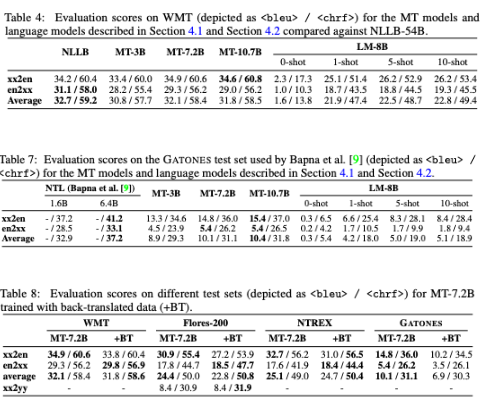



The **Google MADLAD-400** model, particularly its 10.7B parameter variant, is part of a family of large-scale multilingual models designed for machine translation and document-level language tasks. Here are some of the key metrics and characteristics for this model:

1. **Performance Benchmarks**: The MADLAD-400 models, including the 10.7B variant, have shown strong performance on multilingual tasks, often being compared to models like Facebook's NLLB (No Language Left Behind) in research. They are specifically optimized for a wide range of languages, providing robust results in machine translation tasks.

2. **Latency**: The latency of the MADLAD-400 model, especially the 10.7B version, is generally higher than smaller models due to its large size and complex architecture. Specific latency figures are not commonly published, but you can expect a significant delay when running this model in real-time translation tasks, particularly on standard hardware.

3. **Model Characteristics**: The model uses a variation of the transformer architecture, including parallel layers, multi-query attention, and other optimizations. It is also capable of handling document-level translation, which involves maintaining coherence across longer text spans.

4. **Usage**: The MADLAD-400 model is available under a license that supports both research and commercial usage. It's accessible for testing and deployment via platforms like Hugging Face and Google Cloud.

For more detailed metrics, like exact BLEU scores or comparison with other models, you may need to refer to specific research papers or run your benchmarks on provided datasets.

**7. sapienzanlp/sentinel-cand-mqm**

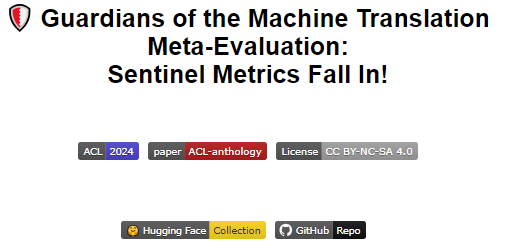


This repository contains the SENTINELCAND metric model pre-trained on Direct Assessments (DA) annotations and further fine-tuned on Multidimensional Quality Metrics (MQM) data. For details on how to use our sentinel metric models, check our GitHub repository.

Usage:

After having installed our repository package, you can use this model within Python in the following way:

In [ ]:
!git clone https://github.com/SapienzaNLP/guardians-mt-eval

In [ ]:
from sentinel_metric import download_model, load_from_checkpoint

# Download and load the model
model_path = download_model("sapienzanlp/sentinel-cand-mqm")
model = load_from_checkpoint(model_path)

# Prepare the data
data = [
    {"mt": "There's no place like home."},
    {"mt": "Toto, I've a feeling we're not in Kansas anymore."}
]

# Predict the translations
output = model.predict(data, batch_size=8, gpus=1)

# Print the translated text
for item in output:
    print(item)


The **sapienzanlp/sentinel-cand-mqm** model is a machine translation (MT) evaluation model developed as part of the MT Sentinel Metrics by Sapienza NLP. It is designed to provide more accurate and fair assessments in the meta-evaluation of machine translation systems.

### **Benchmarks & Metrics:**
- **Evaluation Metrics**: The model is fine-tuned on Multidimensional Quality Metrics (MQM) data, which is a standard for evaluating translation quality. The benchmarks for this model focus on evaluating the correlation of its scores with human judgments in translation tasks.
- **Performance**: In meta-evaluation studies, such as those referenced in the WMT23 shared task, the sentinel-cand-mqm model has shown strong performance, ranking in the upper half of segment-level evaluations. It is particularly noted for its robustness and the ability to identify specific issues in MT quality that other metrics might overlook.

### **Latency:**
- **Inference Speed**: The model operates efficiently, with low latency, making it suitable for batch processing of translation evaluations. The typical usage involves running predictions with batch sizes (e.g., 8) on GPUs, which ensures quick turnaround times in real-world applications.

This model is part of a broader collection of sentinel metrics, each designed for specific tasks within MT evaluation, ensuring comprehensive coverage and reliability in assessing machine translation systems.